# Cleaned Data set merge code

This file merges previously cleaned data sets, and creates the master file for analysis.

## Imports

In [1]:
import pandas as pd
import seaborn as sn
import pandas_profiling as pp
import numpy as np
from matplotlib import pyplot as pl
%matplotlib tk

In [2]:
product1 = pd.read_csv("cleaned_products.csv")
transact1 = pd.read_csv("cleaned_online_transaction.csv")

### Index was promoted as a column into the CSV files and needs to be dropped

In [3]:
transact1.head(1)

,Unnamed: 0,DAY_DT,LOC_IDNT,DBSKU,ONLINE_FLAG,FULL_PRICE_IND,TOTAL_SALES,TOTAL_UNITS,TOTAL_SALES_PRFT,TOTAL_COST,UNIT_SALES_PRICE
0,460415,2015-08-11,4150,2105437.0,1,1,307.51,6.0,191.17,116.34,51.251667


In [5]:
product1.head(1)

,Unnamed: 0,DBSKU,DEPARTMENT,CLASS,SUBCLASS,SUBCLASS_NAME,DSUBCLASS
0,0,2182204.0,12,3,32,Sub Class 1,1232


#### Drop Headers

In [6]:
transact1=transact1.drop('Unnamed: 0',axis=1)

In [7]:
product1=product1.drop('Unnamed: 0',axis=1)

## Merge Transaction and Store data

In [9]:
transact1.isnull().sum()

DAY_DT              0
LOC_IDNT            0
DBSKU               0
ONLINE_FLAG         0
FULL_PRICE_IND      0
TOTAL_SALES         0
TOTAL_UNITS         0
TOTAL_SALES_PRFT    0
TOTAL_COST          0
UNIT_SALES_PRICE    0
dtype: int64

In [10]:
transact1.shape

(329116, 10)

In [21]:
transact2=transact2.dropna()

### Visualize new joined data set, start identifying anomalies if any

In [51]:
transact2.shape

(12596097, 14)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002181C5D57B8>,
      dtype=object)

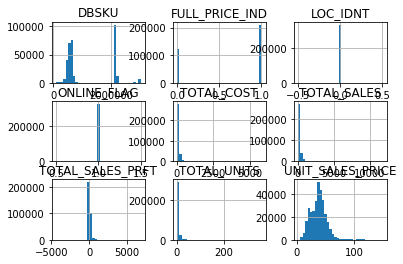

In [13]:
transact1.hist(bins=35)

In [56]:
#pp.ProfileReport(transact1).to_file(outputfile="./OnlineTransactionsReport.html")

#### This join looks acceptable on an initial analysis basis, we proceed to introduce product data to the dataset

## Merge Transaction and Product data

In [14]:
transact2=transact1.merge(product1,how='left',on="DBSKU")

In [15]:
transact2.shape

(329116, 15)

In [17]:
transact2.isnull().sum()

DAY_DT              0
LOC_IDNT            0
DBSKU               0
ONLINE_FLAG         0
FULL_PRICE_IND      0
TOTAL_SALES         0
TOTAL_UNITS         0
TOTAL_SALES_PRFT    0
TOTAL_COST          0
UNIT_SALES_PRICE    0
DEPARTMENT          0
CLASS               0
SUBCLASS            0
SUBCLASS_NAME       0
DSUBCLASS           0
dtype: int64

In [21]:
transact2.head()

,DAY_DT,LOC_IDNT,DBSKU,ONLINE_FLAG,FULL_PRICE_IND,TOTAL_SALES,TOTAL_UNITS,TOTAL_SALES_PRFT,TOTAL_COST,UNIT_SALES_PRICE,DEPARTMENT,CLASS,SUBCLASS,SUBCLASS_NAME,DSUBCLASS
0,2015-08-11,4150,2105437.0,1,1,307.51,6.0,191.17,116.34,51.251667,12,4,42,Sub Class 1,1242
1,2015-08-18,4150,307272.0,1,1,214.75,5.0,131.00,83.75,42.950000,10,4,41,Sub Class 2,1041
2,2015-08-04,4150,2995522.0,1,0,83.70,3.0,13.20,70.50,27.900000,12,2,20,Sub Class 4,1220
3,2015-08-17,4150,356840.0,1,1,100.00,1.0,72.00,28.00,100.000000,10,4,41,Sub Class 2,1041
4,2015-08-17,4150,434464.0,1,0,203.45,8.0,11.45,192.00,25.431250,10,4,41,Sub Class 2,1041


In [72]:
#pp.ProfileReport(transact2).to_file(outputfile="./combinedOnlineDataset.html")

### Output to CSV

In [22]:
transact2.to_csv('tmc_online_data.csv',index=False)